In [195]:
import pandas as pd
import pandasql as ps
pd.options.display.max_columns = 999

In [196]:
Athletes = pd.read_excel('Athletes.xlsx',engine = 'openpyxl')
Coaches = pd.read_excel('Coaches.xlsx',engine = 'openpyxl')
EntriesGender = pd.read_excel('EntriesGender.xlsx',engine = 'openpyxl')
Medals = pd.read_excel('Medals.xlsx',engine = 'openpyxl')
Teams = pd.read_excel('Teams.xlsx',engine = 'openpyxl')

/usr/local/lib/python3.6/dist-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Atlhetes for Each Country


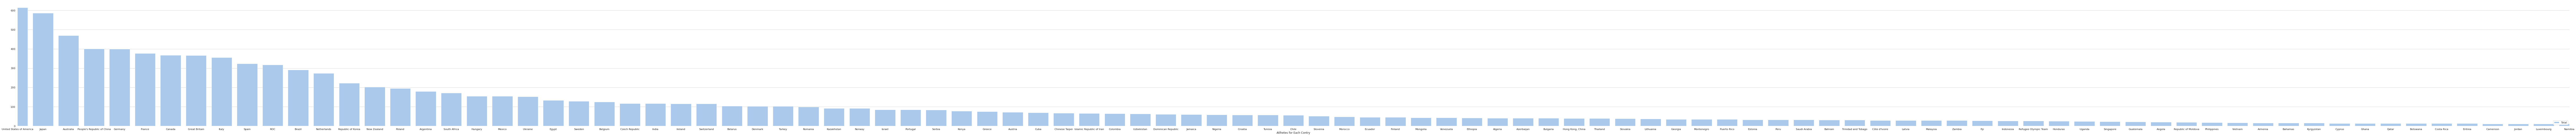

In [197]:
Query_Count_Athletes = """

        SELECT COUNT(Name) As Count_Athletes, NOC
          FROM Athletes 
      GROUP BY NOC
      order BY Count_Athletes DESC
 
"""
Query_Count_Athletes = ps.sqldf(Query_Count_Athletes, globals())
Query_Count_Athletes

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(200, 10))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="NOC", y="Count_Athletes", data=Query_Count_Athletes,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Atlhetes for Each Contry")
sns.despine(left=True, bottom=True)

print("Atlhetes for Each Country")

Coaches for Each Country


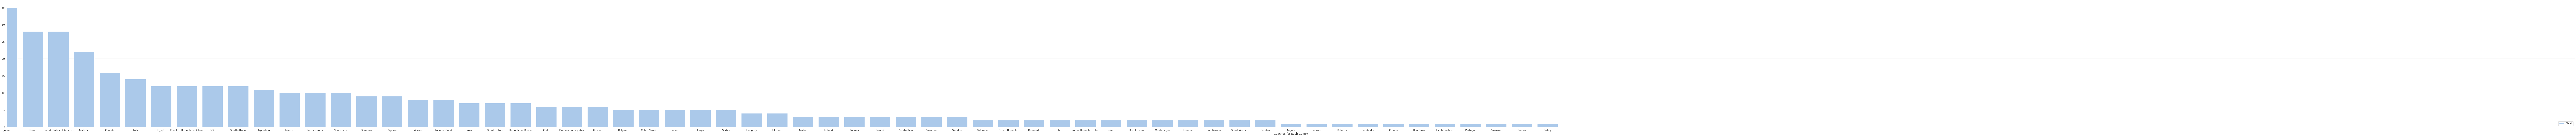

In [198]:
Query_Count_Coaches = """

        SELECT COUNT(Name) As Count_Coaches, NOC
          FROM Coaches 
      GROUP BY NOC
      ORDER BY Count_Coaches DESC
"""
Query_Count_Coaches = ps.sqldf(Query_Count_Coaches, globals())
Query_Count_Coaches

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(200, 10))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="NOC", y="Count_Coaches", data=Query_Count_Coaches,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Coaches for Each Contry")
sns.despine(left=True, bottom=True)

print("Coaches for Each Country")

Discipline for Each Country


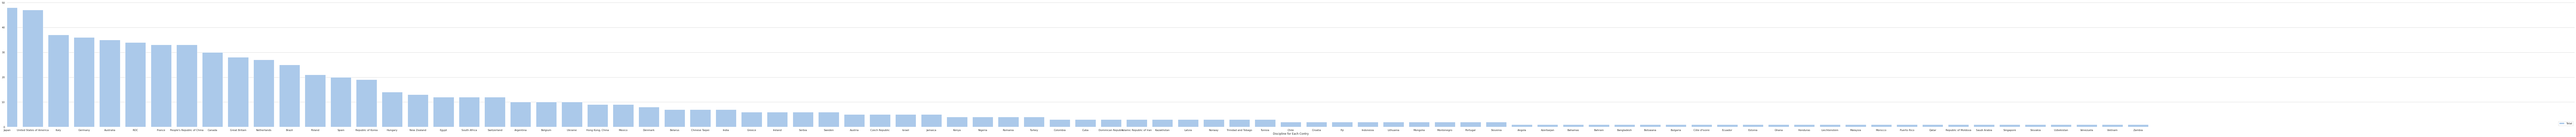

In [199]:
Query_Count_Discipline = """

        SELECT COUNT(Discipline) As Count_Discipline, NOC
          FROM Teams 
      GROUP BY NOC
      ORDER BY Count_Discipline DESC

"""
Query_Count_Discipline = ps.sqldf(Query_Count_Discipline, globals())
Query_Count_Discipline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(200, 10))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="NOC", y="Count_Discipline", data=Query_Count_Discipline,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Discipline for Each Contry")
sns.despine(left=True, bottom=True)

print("Discipline for Each Country")

In [200]:
Medals = Medals.rename(columns={'Team/NOC':'NOC'})
Query_Medals = """

        SELECT Medals.Rank, Medals.NOC, Medals.Gold, Medals.Silver, Medals.Bronze, Medals.Total, Query_Count_Discipline.Count_Discipline, Query_Count_Coaches.Count_Coaches, Query_Count_Athletes.Count_Athletes
          FROM Medals 
          JOIN Query_Count_Discipline
            ON Medals.NOC = Query_Count_Discipline.NOC
          JOIN Query_Count_Coaches
            ON Medals.NOC = Query_Count_Coaches.NOC
          JOIN Query_Count_Athletes
            ON Medals.NOC = Query_Count_Athletes.NOC


"""
Query_Medals = ps.sqldf(Query_Medals, globals())
Query_Medals

,Rank,NOC,Gold,Silver,Bronze,Total,Count_Discipline,Count_Coaches,Count_Athletes
0,1,United States of America,7,3,4,14,47,28,615
1,2,Japan,7,1,3,11,48,35,586
2,3,People's Republic of China,6,3,6,15,33,12,401
3,4,Great Britain,3,2,1,6,28,7,366
4,5,Republic of Korea,3,0,4,7,19,7,223
5,6,ROC,2,5,3,10,34,12,318
6,7,Australia,2,1,3,6,35,22,470
7,9,Italy,1,3,4,8,37,14,356
8,10,France,1,2,2,5,33,10,377
9,11,Canada,1,2,1,4,30,16,368


In [201]:
Query_Medals['Porc_Athletes_Medals'] = (Query_Medals.Total/Query_Medals.Count_Athletes)
Query_Medals['Porc_Athletes_Discipline'] = (Query_Medals.Total/Query_Medals.Count_Discipline)

In [202]:
Query_Medals

,Rank,NOC,Gold,Silver,Bronze,Total,Count_Discipline,Count_Coaches,Count_Athletes,Porc_Athletes_Medals,Porc_Athletes_Discipline
0,1,United States of America,7,3,4,14,47,28,615,0.022764,0.297872
1,2,Japan,7,1,3,11,48,35,586,0.018771,0.229167
2,3,People's Republic of China,6,3,6,15,33,12,401,0.037406,0.454545
3,4,Great Britain,3,2,1,6,28,7,366,0.016393,0.214286
4,5,Republic of Korea,3,0,4,7,19,7,223,0.031390,0.368421
5,6,ROC,2,5,3,10,34,12,318,0.031447,0.294118
6,7,Australia,2,1,3,6,35,22,470,0.012766,0.171429
7,9,Italy,1,3,4,8,37,14,356,0.022472,0.216216
8,10,France,1,2,2,5,33,10,377,0.013263,0.151515
9,11,Canada,1,2,1,4,30,16,368,0.010870,0.133333


Total Medals


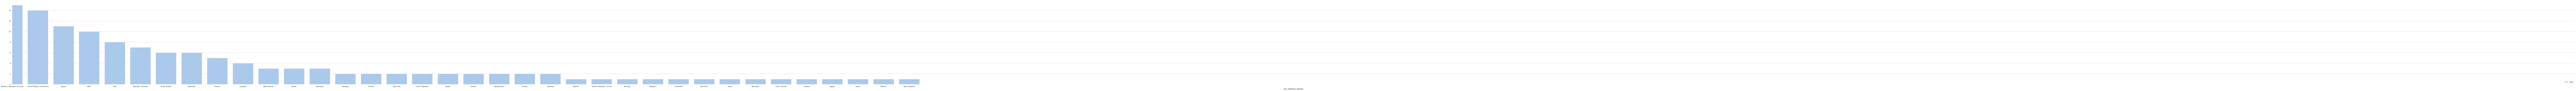

In [203]:
Porc_Athletes_Medals = """

        SELECT *
          FROM Query_Medals 
      ORDER BY Total DESC

"""
Porc_Athletes_Medals = ps.sqldf(Porc_Athletes_Medals, globals())
Porc_Athletes_Medals


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(300, 10))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="NOC", y="Total", data=Porc_Athletes_Medals,
            label="Total", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Porc_Athletes_Medals")
sns.despine(left=True, bottom=True)

print("Total Medals")

Relationship Between Total Participants and Medal Winners


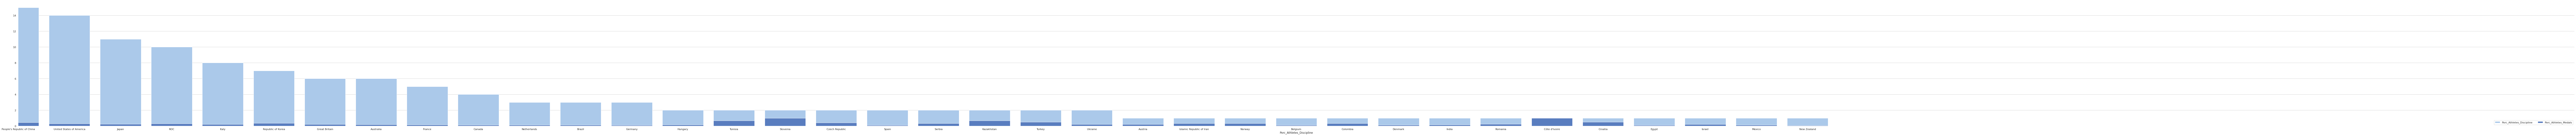

In [204]:
Porc_Athletes_Medals = """

        SELECT *
          FROM Query_Medals 
      ORDER BY Total DESC

"""
Porc_Athletes_Medals = ps.sqldf(Porc_Athletes_Medals, globals())
Porc_Athletes_Medals


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(200, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="NOC", y="Total", data=Porc_Athletes_Medals,
            label="Porc_Athletes_Discipline", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="NOC", y="Porc_Athletes_Discipline", data=Porc_Athletes_Medals,
            label="Porc_Athletes_Medals", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50), ylabel="",
       xlabel="Porc_Athletes_Discipline")
sns.despine(left=True, bottom=True)

print("Relationship Between Total Participants and Medal Winners")

In [205]:
Athletes = pd.read_excel('Athletes.xlsx',engine = 'openpyxl')
Coaches = pd.read_excel('Coaches.xlsx',engine = 'openpyxl')
EntriesGender = pd.read_excel('EntriesGender.xlsx',engine = 'openpyxl')
Medals = pd.read_excel('Medals.xlsx',engine = 'openpyxl')
Teams = pd.read_excel('Teams.xlsx',engine = 'openpyxl')

/usr/local/lib/python3.6/dist-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [206]:
Count_Name_Discipline = """

        SELECT COUNT (Name) Count_Name, NOC, count(Discipline) as Sum_Discipline
          FROM Athletes 
      GROUP BY NOC
      ORDER BY Sum_Discipline DESC

"""
Count_Name_Discipline = ps.sqldf(Count_Name_Discipline, globals())
Count_Name_Discipline

,Count_Name,NOC,Sum_Discipline
0,615,United States of America,615
1,586,Japan,586
2,470,Australia,470
3,401,People's Republic of China,401
4,400,Germany,400
...,...,...,...
201,2,South Sudan,2
202,2,St Vincent and the Grenadines,2
203,2,Tuvalu,2
204,2,United Republic of Tanzania,2


In [207]:
Count_Name_Discipline_Medals = """

        SELECT *
          FROM Count_Name_Discipline 
          JOIN Query_Medals
            ON Count_Name_Discipline.NOC = Query_Medals.NOC  

"""
Count_Name_Discipline_Medals = ps.sqldf(Count_Name_Discipline_Medals, globals())
Count_Name_Discipline_Medals

,Count_Name,NOC,Sum_Discipline,Rank,NOC,Gold,Silver,Bronze,Total,Count_Discipline,Count_Coaches,Count_Athletes,Porc_Athletes_Medals,Porc_Athletes_Discipline
0,615,United States of America,615,1,United States of America,7,3,4,14,47,28,615,0.022764,0.297872
1,586,Japan,586,2,Japan,7,1,3,11,48,35,586,0.018771,0.229167
2,470,Australia,470,7,Australia,2,1,3,6,35,22,470,0.012766,0.171429
3,401,People's Republic of China,401,3,People's Republic of China,6,3,6,15,33,12,401,0.037406,0.454545
4,400,Germany,400,36,Germany,0,0,3,3,36,9,400,0.007500,0.083333
5,377,France,377,10,France,1,2,2,5,33,10,377,0.013263,0.151515
6,368,Canada,368,11,Canada,1,2,1,4,30,16,368,0.010870,0.133333
7,366,Great Britain,366,4,Great Britain,3,2,1,6,28,7,366,0.016393,0.214286
8,356,Italy,356,9,Italy,1,3,4,8,37,14,356,0.022472,0.216216
9,324,Spain,324,25,Spain,0,1,1,2,20,28,324,0.006173,0.100000


In [208]:
dummies_Porc_Athletes_Medals = pd.get_dummies(pd.qcut(Count_Name_Discipline_Medals.Porc_Athletes_Medals, q=3, labels=['Porc_Athletes_Medals_Bajo','Porc_Athletes_Medals_Medio','Porc_Athletes_Medals_Alto']))
dummies_Porc_Porc_Athletes_Discipline = pd.get_dummies(pd.qcut(Count_Name_Discipline_Medals.Porc_Athletes_Discipline, q=3, labels=['Porc_Athletes_Discipline_Bajo','Porc_Athletes_Discipline_Medio','Porc_Athletes_Discipline_Alto']))
dummies_Number_Athletes = pd.get_dummies(pd.qcut(Count_Name_Discipline_Medals.Count_Name,q=3,labels=['Number_Athletes_Low','Number_Athletes_Normal','Number_Athletes_High']))
dummies_Count_Disciplines = pd.get_dummies(pd.qcut(Count_Name_Discipline_Medals.Count_Discipline,q=3,labels=['Count_Discipline_Low','Count_Discipline_Normal','Count_Discipline_High']))
dummies_Count_Coaches = pd.get_dummies(pd.qcut(Count_Name_Discipline_Medals.Count_Coaches,q=3,labels=['Count_Coaches_Low','Count_Coaches_Normal','Count_Coaches_High']))

In [209]:
MATRIX_PREDICTION = pd.concat([ Count_Name_Discipline_Medals,
            dummies_Porc_Athletes_Medals,
            dummies_Porc_Porc_Athletes_Discipline,
            dummies_Number_Athletes,
            dummies_Count_Disciplines,
            dummies_Count_Coaches
           
          ],axis=1).drop(['Rank','Count_Name','Sum_Discipline','NOC','Count_Discipline','Count_Coaches','Count_Athletes','Porc_Athletes_Medals','Porc_Athletes_Discipline'],axis=1)

MATRIX_PREDICTION['Name'] = Count_Name_Discipline_Medals.iloc[:,1]

In [210]:
MATRIX_PREDICTION

,Gold,Silver,Bronze,Total,Porc_Athletes_Medals_Bajo,Porc_Athletes_Medals_Medio,Porc_Athletes_Medals_Alto,Porc_Athletes_Discipline_Bajo,Porc_Athletes_Discipline_Medio,Porc_Athletes_Discipline_Alto,Number_Athletes_Low,Number_Athletes_Normal,Number_Athletes_High,Count_Discipline_Low,Count_Discipline_Normal,Count_Discipline_High,Count_Coaches_Low,Count_Coaches_Normal,Count_Coaches_High,Name
0,7,3,4,14,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,United States of America
1,7,1,3,11,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,Japan
2,2,1,3,6,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,Australia
3,6,3,6,15,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,People's Republic of China
4,0,0,3,3,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,Germany
5,1,2,2,5,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,France
6,1,2,1,4,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,Canada
7,3,2,1,6,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,Great Britain
8,1,3,4,8,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,Italy
9,0,1,1,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,Spain


In [175]:
MATRIX_PREDICTION.to_csv('MATRIX_PREDICTION.csv',sep0